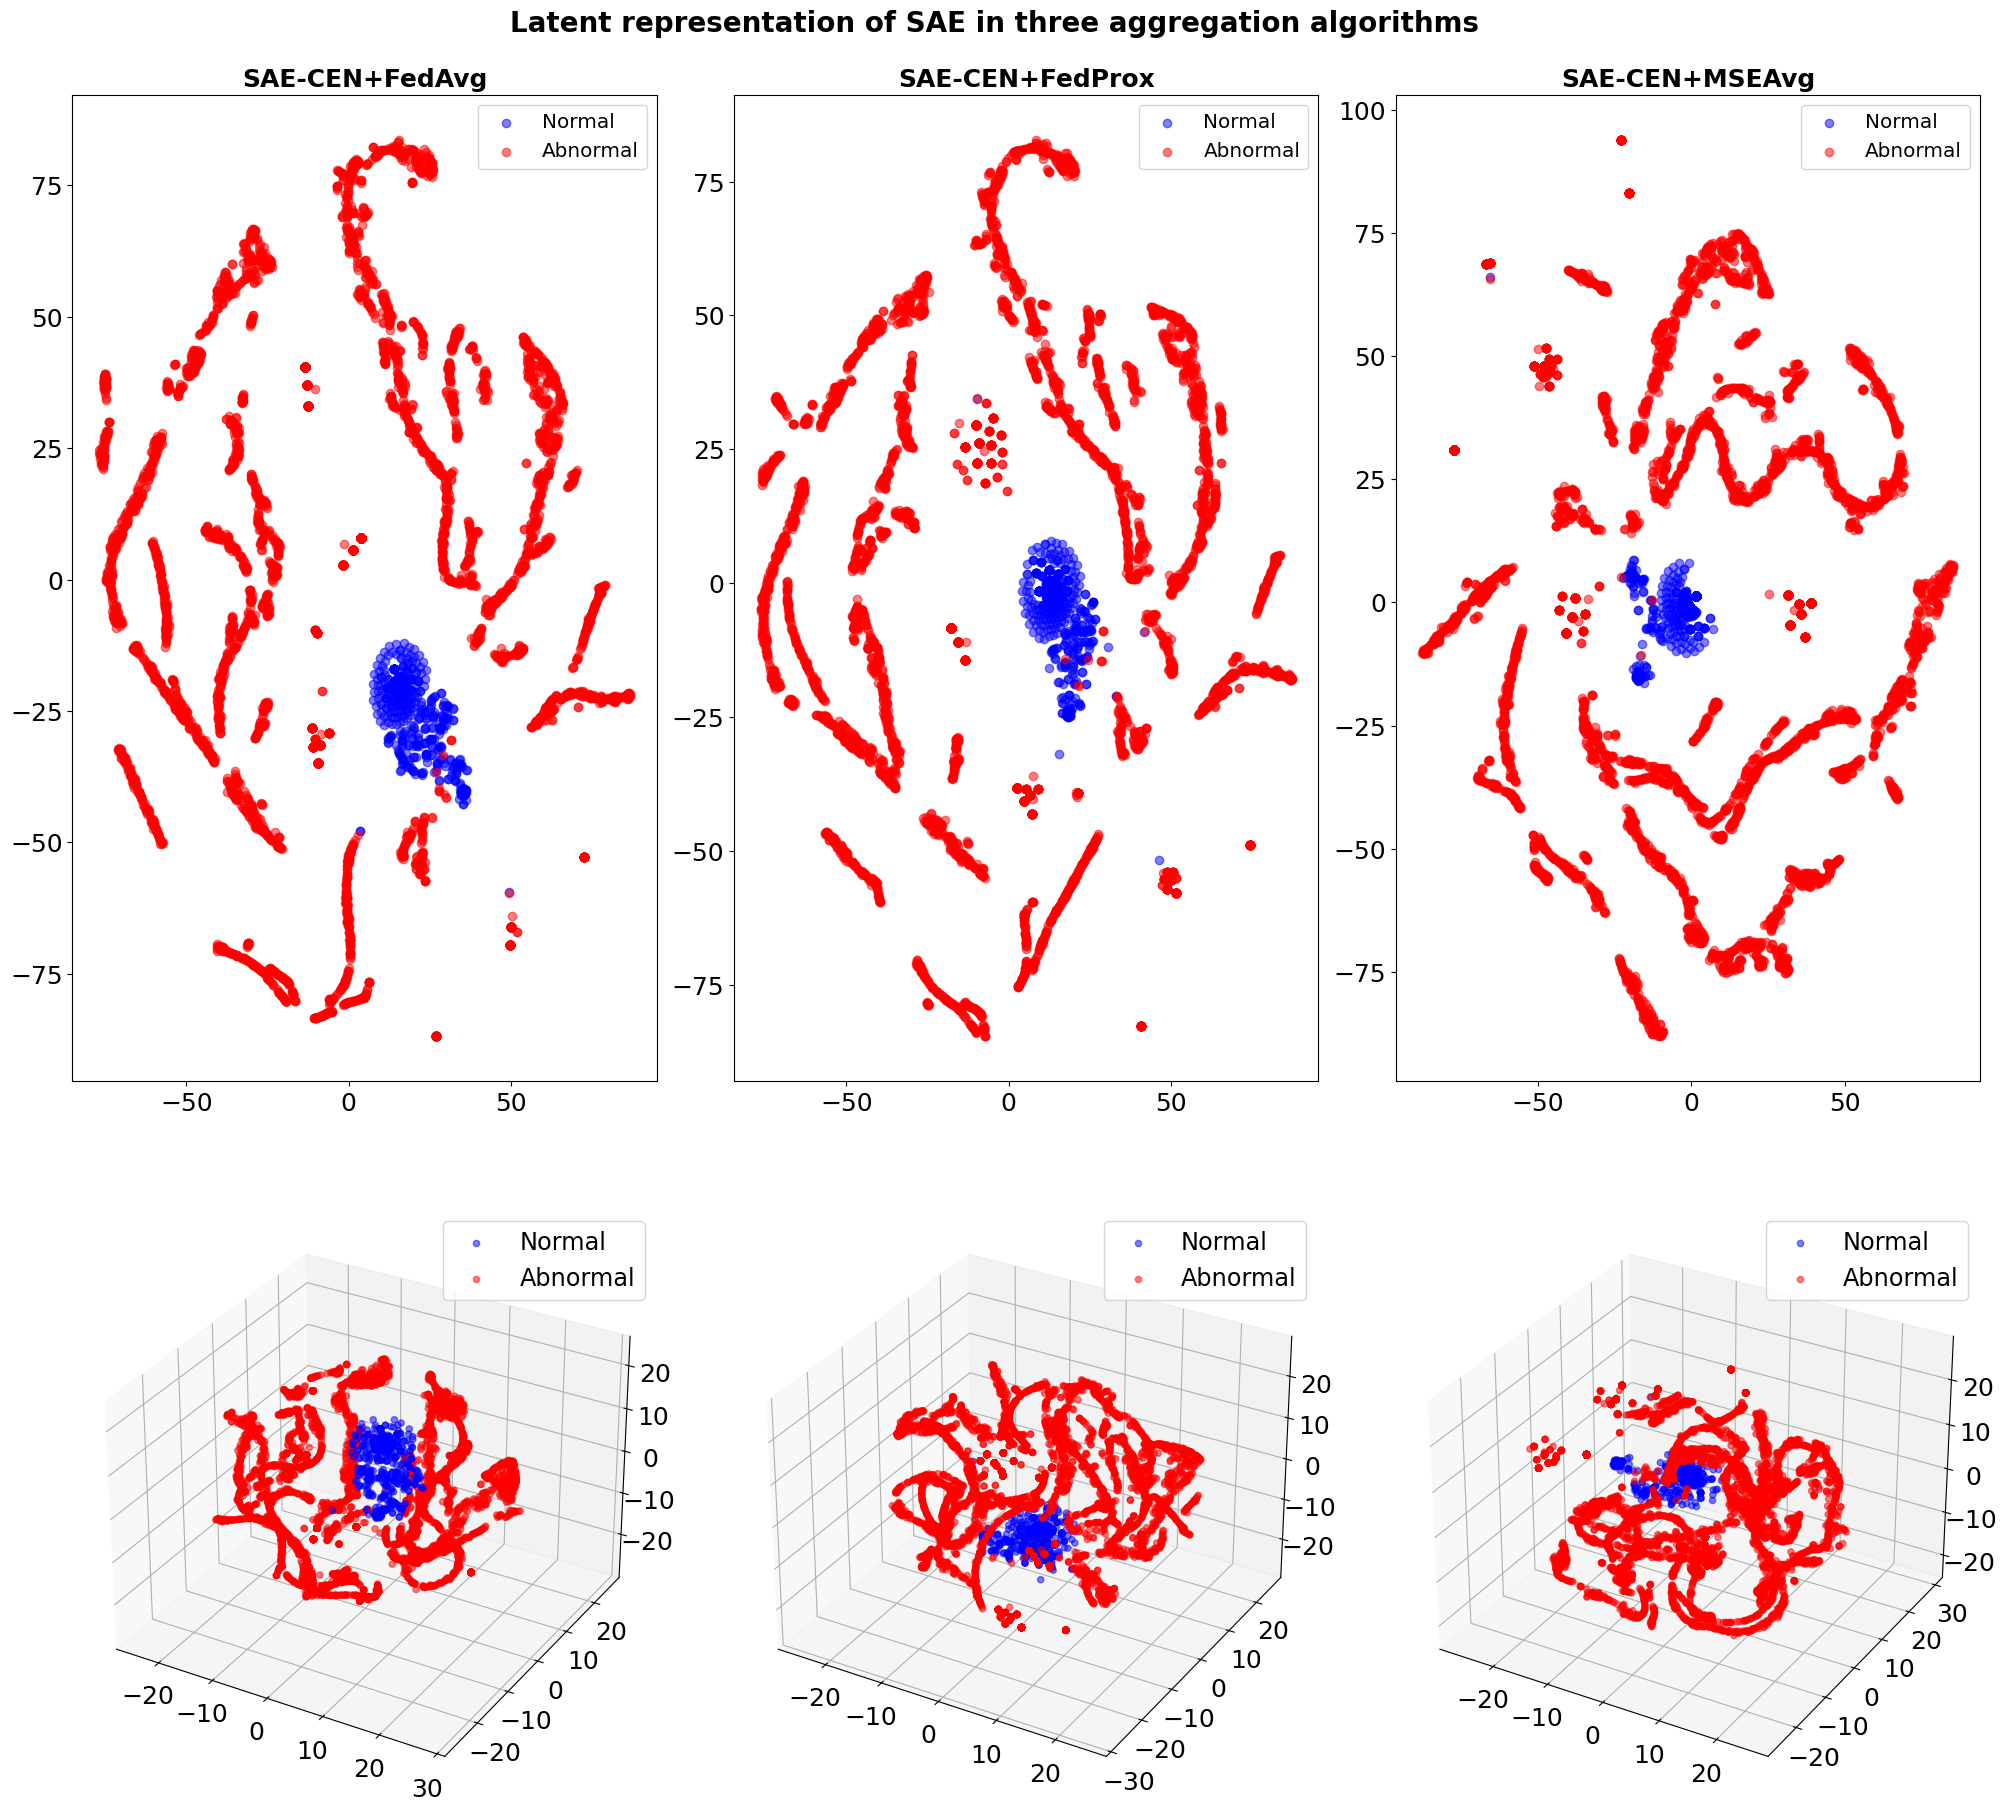

In [10]:
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

import random

# random.seed(42)

# Define parameters
run = 2
network_size = 10
# no_Exp = "nonIID_Exp5_validate_all_clients_Rerun_100epoch_10client_20rounds_lr1e-05_lamda10_ratio50.0"
no_Exp = "nonIID-Update_Exp5_100epoch_10client_20rounds_lr1e-05_lamda10_ratio50.0_dataseed1234"
device_name = "NBa-Scen2-Client-5"

# Define the file paths
file_path1 = f'../Checkpoint/LatentData/{network_size}/{no_Exp}/Run_{run}/latent_hybrid_avg.pkl'
file_path2 = f'../Checkpoint/LatentData/{network_size}/{no_Exp}/Run_{run}/latent_hybrid_fedprox.pkl'
file_path3 = f'../Checkpoint/LatentData/{network_size}/{no_Exp}/Run_{run}/latent_hybrid_mse_avg.pkl'

# Load the data
with open(file_path1, 'rb') as f:
    client_latent1 = pickle.load(f)

with open(file_path2, 'rb') as f:
    client_latent2 = pickle.load(f)

with open(file_path3, 'rb') as f:
    client_latent3 = pickle.load(f)

# Function to plot data in 2D
def plot_data_2d(client_latent, ax):
    # Initialize t-SNE with 2 components
    tsne = TSNE(n_components=2)
    # Get latent data and labels
    latent_data, labels = client_latent[device_name]
    
    # Apply t-SNE
    tsne_result = tsne.fit_transform(latent_data)
    
    # Plot the results
    ax.scatter(tsne_result[labels == 0, 0], tsne_result[labels == 0, 1], color='blue', label='Normal', alpha=0.5)
    ax.scatter(tsne_result[labels == 1, 0], tsne_result[labels == 1, 1], color='red', label='Abnormal', alpha=0.5)

    ax.legend(fontsize='x-large')

# Function to plot data in 3D
def plot_data_3d(client_latent, ax):
    # Initialize t-SNE with 3 components
    tsne = TSNE(n_components=3)
    # Get latent data and labels
    latent_data, labels = client_latent[device_name]
    
    # Apply t-SNE
    tsne_result = tsne.fit_transform(latent_data)
    
    # Plot the results
    ax.scatter(tsne_result[labels == 0, 0], tsne_result[labels == 0, 1], tsne_result[labels == 0, 2], color='blue', label='Normal', alpha=0.5)
    ax.scatter(tsne_result[labels == 1, 0], tsne_result[labels == 1, 1], tsne_result[labels == 1, 2], color='red', label='Abnormal', alpha=0.5)

    # ax.legend(fontsize='x-large')
    ax.legend(fontsize='xx-large')  # Increased font size

# Create a figure with a grid layout
fig = plt.figure(figsize=(20, 20))

fig.suptitle('Latent representation of SAE in three aggregation algorithms', fontsize=20, fontweight='bold', y=1.0)

# 2D plots in the first row
ax2d_1 = fig.add_subplot(231)
ax2d_2 = fig.add_subplot(232)
ax2d_3 = fig.add_subplot(233)
ax2d_1.set_title('SAE-CEN+FedAvg', fontsize=18, fontweight='bold')
ax2d_2.set_title('SAE-CEN+FedProx', fontsize=18, fontweight='bold')
ax2d_3.set_title('SAE-CEN+MSEAvg', fontsize=18, fontweight='bold')

# 3D plots in the second row
ax3d_1 = fig.add_subplot(234, projection='3d')
ax3d_2 = fig.add_subplot(235, projection='3d')
ax3d_3 = fig.add_subplot(236, projection='3d')
# ax3d_1.set_title('SAE_CEN+FedAvg (3D)', fontsize=18, fontweight='bold')
# ax3d_2.set_title('SAE_CEN+FedProx (3D)', fontsize=18, fontweight='bold')
# ax3d_3.set_title('SAE_CEN+MSEAvg (3D)', fontsize=18, fontweight='bold')

# Get the second last round for each client and plot the data
for i, (client, ax2d, ax3d) in enumerate(zip([client_latent1, client_latent2, client_latent3], [ax2d_1, ax2d_2, ax2d_3], [ax3d_1, ax3d_2, ax3d_3])):
    rounds = list(client.keys())
    second_last_round = rounds[-2]
    plot_data_2d(client[second_last_round], ax2d)
    plot_data_3d(client[second_last_round], ax3d)

# Increase font size for axis values
for ax in [ax2d_1, ax2d_2, ax2d_3]:
    ax.tick_params(axis='both', which='major', labelsize=18)

for ax in [ax3d_1, ax3d_2, ax3d_3]:
    ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
# plt.savefig("update_latent_2d_3d_visualization_client5_50.0.pdf")
plt.show()
